In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#import mglearn

from sklearn.datasets import load_breast_cancer#导入数据
cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


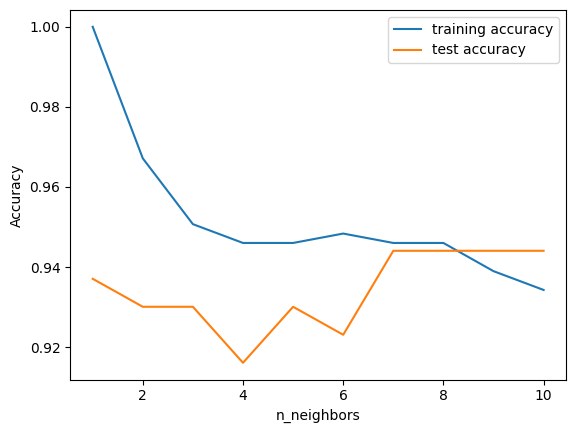

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 42)#划分数据
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)#构建模型
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    training_accuracy.append(clf.score(X_train,y_train))#记录训练集精度
    test_accuracy.append(clf.score(X_test,y_test))#记录泛化精度
plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings,test_accuracy,label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [3]:
from sklearn.linear_model import LogisticRegression#逻辑斯蒂回归
logreg = LogisticRegression(C=122,penalty = "l2")
logreg.fit(X_train,y_train)
print("训练集精度为: {:.3f}".format((logreg.score(X_train,y_train))))
print("测试集精度为: {:.3f}".format((logreg.score(X_test,y_test))))

训练集精度为: 0.946
测试集精度为: 0.958


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
type(logreg)

sklearn.linear_model._logistic.LogisticRegression

In [5]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [10]:
X_train

array([[1.989e+01, 2.026e+01, 1.305e+02, ..., 1.613e-01, 2.549e-01,
        9.136e-02],
       [1.289e+01, 1.312e+01, 8.189e+01, ..., 5.366e-02, 2.309e-01,
        6.915e-02],
       [1.714e+01, 1.640e+01, 1.160e+02, ..., 2.550e-01, 4.066e-01,
        1.059e-01],
       ...,
       [1.546e+01, 2.395e+01, 1.038e+02, ..., 2.163e-01, 3.013e-01,
        1.067e-01],
       [1.705e+01, 1.908e+01, 1.134e+02, ..., 2.543e-01, 3.109e-01,
        9.061e-02],
       [9.777e+00, 1.699e+01, 6.250e+01, ..., 5.334e-02, 2.533e-01,
        8.468e-02]])

In [4]:
log1 = []
for i in range(cancer.data.shape[1]):
    log1.append(logreg.coef_.T[i][0])
    print("{:.5f}".format(log1[i]),end = " ")

0.86465 -0.19421 0.11860 -0.00520 -12.08857 65.66613 -5.47118 -86.89571 0.00000 0.00000 -1.02129 0.72684 0.95089 -0.24509 0.00000 0.00000 36.61196 0.00000 35.06086 0.00000 0.32247 -0.30381 0.04122 -0.02317 -50.61160 0.28941 -10.51733 -45.25151 -19.60696 0.00000 

In [14]:
from sklearn.svm import LinearSVC#线性支持向量分类器
linear_svm = LinearSVC(C=10)
linear_svm.fit(X_train,y_train)
print("训练集精度为: {:.3f}".format((linear_svm.score(X_train,y_train))))
print("测试集精度为: {:.3f}".format((linear_svm.score(X_test,y_test))))

训练集精度为: 0.930
测试集精度为: 0.937


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [3]:
from sklearn.tree import DecisionTreeClassifier#决策树
tree = DecisionTreeClassifier(max_depth = 4 ,random_state = 0)
tree.fit(X_train,y_train)
print("训练集精度为: {:.3f}".format((tree.score(X_train,y_train))))
print("测试集精度为: {:.3f}".format((tree.score(X_test,y_test))))
tree.feature_importances_

训练集精度为: 0.988
测试集精度为: 0.951


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

<function list.clear()>

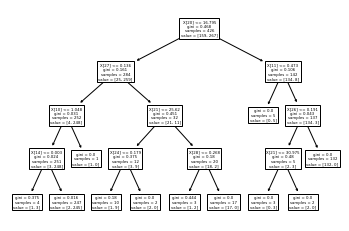

In [22]:
sklearn.tree.plot_tree(tree).clear

In [20]:
tree.apply

<bound method BaseDecisionTree.apply of DecisionTreeClassifier(max_depth=4, random_state=0)>

In [10]:
tree.decision_path(X_train).todense()

matrix([[1, 0, 0, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file = "tree.dot",class_names = ["malignant","benign"],feature_names = cancer.feature_names,impurity = False,filled = True)

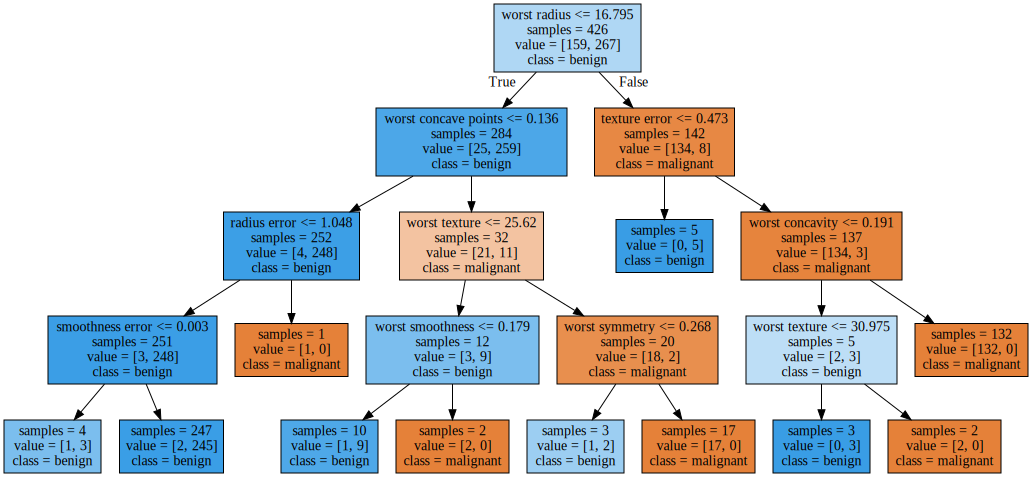

In [8]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [15]:
from sklearn.ensemble import RandomForestClassifier#随机森林
forest = RandomForestClassifier(n_estimators = 100,random_state = 0)
forest.fit(X_train,y_train)
print("训练集精度为: {:.3f}".format((forest.score(X_train,y_train))))
print("测试集精度为: {:.3f}".format((forest.score(X_test,y_test))))

训练集精度为: 1.000
测试集精度为: 0.958


In [10]:
forest.feature_importances_

array([0.03428109, 0.01603486, 0.07742074, 0.04462701, 0.00756603,
       0.00421043, 0.05773247, 0.10465483, 0.00561231, 0.00310465,
       0.01828184, 0.00550746, 0.01598658, 0.02849289, 0.00432991,
       0.00457692, 0.00285285, 0.00537969, 0.00521666, 0.0038365 ,
       0.11200226, 0.01973492, 0.14912901, 0.07116392, 0.00837159,
       0.01177922, 0.02616743, 0.13282975, 0.00991387, 0.00920232])

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Text(0, 0.5, 'Feature')

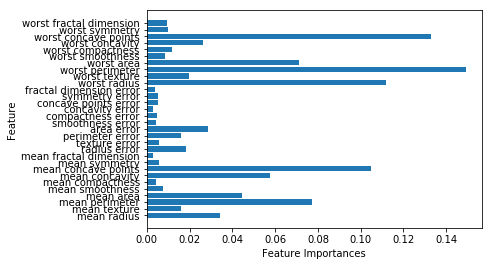

In [13]:
can = {n:v for n,v in zip(cancer['feature_names'],forest.feature_importances_)}
plt.barh(list(can.keys()),list(can.values()),align = 'center')
plt.xlabel("Feature Importances")
plt.ylabel("Feature")

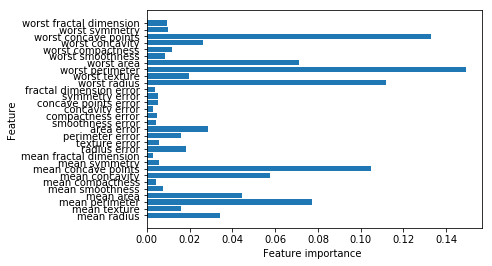

In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance ")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

训练集精度为: 0.988
测试集精度为: 0.958


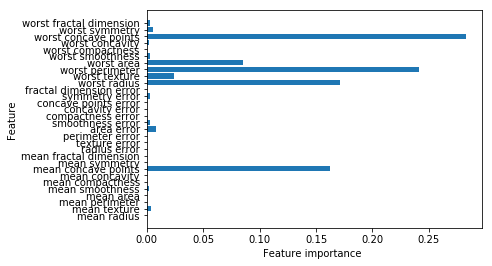

In [15]:
from sklearn.ensemble import GradientBoostingClassifier#梯度提升回归树
gbrt = GradientBoostingClassifier(max_depth = 1,random_state = 0)
gbrt.fit(X_train,y_train)
print("训练集精度为: {:.3f}".format((gbrt.score(X_train,y_train))))
print("测试集精度为: {:.3f}".format((gbrt.score(X_test,y_test))))
plot_feature_importances_cancer(gbrt)

In [97]:
g = gbrt.predict_proba(X_test)
c = cancer['target_names'].reshape(1,2)
v = np.vstack((c,g))

In [109]:
gg = gbrt.predict(X_test)#预测结果
g1 = [cancer['target_names'][gg[i]] for i in range(len(gg))]#输出对应标签

In [111]:
print(g1,end = " ")

['benign', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',

In [1]:
print(__doc__)

from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

Automatically created module for IPython interactive environment
KNN score: 0.961111
LogisticRegression score: 0.933333
